In [1]:
import os
import copy
from matplotlib import pyplot as plt
from cascade.cascade import Cascade
import numpy as np
import cmocean
from cascade.tools import outwash_plotters as out_plt

# B3D Only: Outwash module set to false

In [2]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_b3d_only = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-right-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-right-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=False,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=1.01E-2,
    cx=0.65
)

In [3]:
for time_step in range(cascade_b3d_only._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_b3d_only.update()
    if cascade_b3d_only.b3d_break:
        break

 Time Step:  2

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  99

Text(0, 0.5, 'shoreline position')

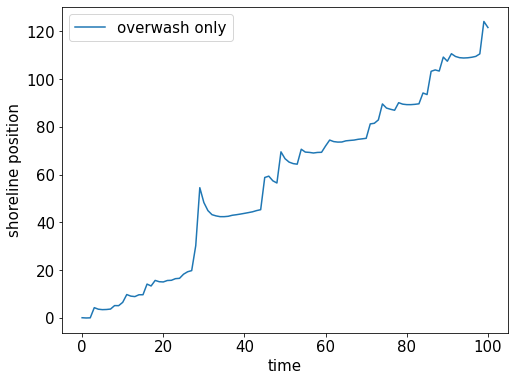

In [4]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

m_xsTS = np.subtract(cascade_b3d_only.barrier3d[0].x_s_TS, cascade_b3d_only.barrier3d[0].x_s_TS[0])
m_xsTS = np.multiply(m_xsTS,10)

plt.plot(m_xsTS, label="overwash only")
plt.legend()
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.savefig(newpath + "shoreline_position", facecolor='w')

In [5]:
# # interior
# initial_domain = cascade_b3d_only.barrier3d[0]._DomainTS[0]
# domain1 = cascade_b3d_only.barrier3d[0]._DomainTS[1]
# domain9 = cascade_b3d_only.barrier3d[0]._DomainTS[9]
# domain10 = cascade_b3d_only.barrier3d[0]._DomainTS[10]
# domain11 = cascade_b3d_only.barrier3d[0]._DomainTS[11]
# # dunes
# initial_dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[0])
# dune_domain1 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[1])
# dune_domain9 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[9])
# dune_domain10 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[10])
# dune_domain11 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[11])
# # full domains
# intial_full = np.vstack([initial_dunes, initial_domain])
# full_domain1 = np.vstack([dune_domain1, domain1])
# full_domain9 = np.vstack([dune_domain9, domain9])
# full_domain10 = np.vstack([dune_domain10, domain10])
# full_domain11 = np.vstack([dune_domain11, domain11])

In [6]:
# # plotting intial
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# mat = ax1.matshow(
#     intial_full*10,
#     cmap="terrain",
# #     vmin=0, vmax=5.0,
#     vmin=-3.0, vmax=4.0,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("Initial Elevation")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()

# # plotting domain 1
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# mat2 = ax2.matshow(
#     full_domain1[:, :]*10,
#     cmap="terrain",
#     vmin=-3.0, vmax=4.0,
# )
# ax2.set_xlabel('barrier length (dam)')
# ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("TS=1")
# plt.gca().xaxis.tick_bottom()
# cbar = fig2.colorbar(mat2)
# cbar.set_label('m MHW', rotation=270, labelpad=15)

# # plotting domain 9
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# mat2 = ax2.matshow(
#     full_domain9[:, :]*10,
#     cmap="terrain",
#     vmin=-3.0, vmax=4.0,
# )
# ax2.set_xlabel('barrier length (dam)')
# ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("TS=9")
# plt.gca().xaxis.tick_bottom()
# cbar = fig2.colorbar(mat2)
# cbar.set_label('m MHW', rotation=270, labelpad=15)

# # plotting domain 10
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# mat2 = ax2.matshow(
#     full_domain10[:, :]*10,
#     cmap="terrain",
#     vmin=-3.0, vmax=4.0,
# )
# ax2.set_xlabel('barrier length (dam)')
# ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("TS=10")
# plt.gca().xaxis.tick_bottom()
# cbar = fig2.colorbar(mat2)
# cbar.set_label('m MHW', rotation=270, labelpad=15)

# # plotting domain 11
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# mat2 = ax2.matshow(
#     full_domain11[:, :]*10,
#     cmap="terrain",
#     vmin=-3.0, vmax=4.0,
# )
# ax2.set_xlabel('barrier length (dam)')
# ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("TS=11")
# plt.gca().xaxis.tick_bottom()
# cbar = fig2.colorbar(mat2)
# cbar.set_label('m MHW', rotation=270, labelpad=15)

# Outwash every 10 years

In [7]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash100 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-right-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-right-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=1.01E-2,
    cx=0.65
)

In [8]:
for time_step in range(cascade_outwash100._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash100.update()
    if cascade_outwash100.b3d_break:
        break

 Time Step:  2

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  19Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Ti

Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Ti

Outwasher Time Step:  1258
Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
O

In [19]:
# m_xsTS_100 = np.subtract(cascade_outwash100.barrier3d[0].x_s_TS, cascade_outwash100.barrier3d[0].x_s_TS[0])
# m_xsTS_100 = np.multiply(m_xsTS_100,10)

# plt.plot(m_xsTS_100)
# # plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.xlabel("time")
# plt.ylabel("shoreline position")


Text(0.5, 1.0, 'Outwash to Shoreface')

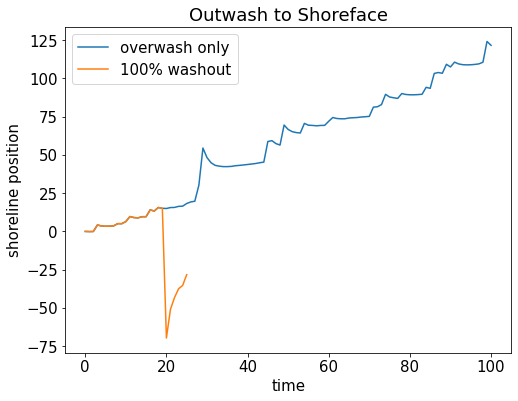

In [10]:
plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.ylim([500, 580])
plt.legend()
plt.title("Outwash to Shoreface")



# 50% Outwash to shoreface

In [11]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash50 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-right-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-right-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=50,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=1.01E-2,
    cx=0.65
)

In [12]:
for time_step in range(cascade_outwash50._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash50.update()
    if cascade_outwash50.b3d_break:
        break

 Time Step:  2

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  19Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Ti

Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Ti

Outwasher Time Step:  1258
Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
O

Outwasher Time Step:  241
Outwasher Time Step:  242
Outwasher Time Step:  243
Outwasher Time Step:  244
Outwasher Time Step:  245
Outwasher Time Step:  246
Outwasher Time Step:  247
Outwasher Time Step:  248
Outwasher Time Step:  249
Outwasher Time Step:  250
Outwasher Time Step:  251
Outwasher Time Step:  252
Outwasher Time Step:  253
Outwasher Time Step:  254
Outwasher Time Step:  255
Outwasher Time Step:  256
Outwasher Time Step:  257
Outwasher Time Step:  258
Outwasher Time Step:  259
Outwasher Time Step:  260
Outwasher Time Step:  261
Outwasher Time Step:  262
Outwasher Time Step:  263
Outwasher Time Step:  264
Outwasher Time Step:  265
Outwasher Time Step:  266
Outwasher Time Step:  267
Outwasher Time Step:  268
Outwasher Time Step:  269
Outwasher Time Step:  270
Outwasher Time Step:  271
Outwasher Time Step:  272
Outwasher Time Step:  273
Outwasher Time Step:  274
Outwasher Time Step:  275
Outwasher Time Step:  276
Outwasher Time Step:  277
Outwasher Time Step:  278
Outwasher Ti

Outwasher Time Step:  557
Outwasher Time Step:  558
Outwasher Time Step:  559
Outwasher Time Step:  560
Outwasher Time Step:  561
Outwasher Time Step:  562
Outwasher Time Step:  563
Outwasher Time Step:  564
Outwasher Time Step:  565
Outwasher Time Step:  566
Outwasher Time Step:  567
Outwasher Time Step:  568
Outwasher Time Step:  569
Outwasher Time Step:  570
Outwasher Time Step:  571
Outwasher Time Step:  572
Outwasher Time Step:  573
Outwasher Time Step:  574
Outwasher Time Step:  575
Outwasher Time Step:  576
Outwasher Time Step:  577
Outwasher Time Step:  578
Outwasher Time Step:  579
Outwasher Time Step:  580
Outwasher Time Step:  581
Outwasher Time Step:  582
Outwasher Time Step:  583
Outwasher Time Step:  584
Outwasher Time Step:  585
Outwasher Time Step:  586
Outwasher Time Step:  587
Outwasher Time Step:  588
Outwasher Time Step:  589
Outwasher Time Step:  590
Outwasher Time Step:  591
Outwasher Time Step:  592
Outwasher Time Step:  593
Outwasher Time Step:  594
Outwasher Ti

Outwasher Time Step:  873
Outwasher Time Step:  874
Outwasher Time Step:  875
Outwasher Time Step:  876
Outwasher Time Step:  877
Outwasher Time Step:  878
Outwasher Time Step:  879
Outwasher Time Step:  880
Outwasher Time Step:  881
Outwasher Time Step:  882
Outwasher Time Step:  883
Outwasher Time Step:  884
Outwasher Time Step:  885
Outwasher Time Step:  886
Outwasher Time Step:  887
Outwasher Time Step:  888
Outwasher Time Step:  889
Outwasher Time Step:  890
Outwasher Time Step:  891
Outwasher Time Step:  892
Outwasher Time Step:  893
Outwasher Time Step:  894
Outwasher Time Step:  895
Outwasher Time Step:  896
Outwasher Time Step:  897
Outwasher Time Step:  898
Outwasher Time Step:  899
Outwasher Time Step:  900
Outwasher Time Step:  901
Outwasher Time Step:  902
Outwasher Time Step:  903
Outwasher Time Step:  904
Outwasher Time Step:  905
Outwasher Time Step:  906
Outwasher Time Step:  907
Outwasher Time Step:  908
Outwasher Time Step:  909
Outwasher Time Step:  910
Outwasher Ti

Outwasher Time Step:  1182
Outwasher Time Step:  1183
Outwasher Time Step:  1184
Outwasher Time Step:  1185
Outwasher Time Step:  1186
Outwasher Time Step:  1187
Outwasher Time Step:  1188
Outwasher Time Step:  1189
Outwasher Time Step:  1190
Outwasher Time Step:  1191
Outwasher Time Step:  1192
Outwasher Time Step:  1193
Outwasher Time Step:  1194
Outwasher Time Step:  1195
Outwasher Time Step:  1196
Outwasher Time Step:  1197
Outwasher Time Step:  1198
Outwasher Time Step:  1199
Outwasher Time Step:  1200
Outwasher Time Step:  1201
Outwasher Time Step:  1202
Outwasher Time Step:  1203
Outwasher Time Step:  1204
Outwasher Time Step:  1205
Outwasher Time Step:  1206
Outwasher Time Step:  1207
Outwasher Time Step:  1208
Outwasher Time Step:  1209
Outwasher Time Step:  1210
Outwasher Time Step:  1211
Outwasher Time Step:  1212
Outwasher Time Step:  1213
Outwasher Time Step:  1214
Outwasher Time Step:  1215
Outwasher Time Step:  1216
Outwasher Time Step:  1217
Outwasher Time Step:  1218
O

c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 Time Step:  40Barrier has HEIGHT DROWNED at t = 41 years


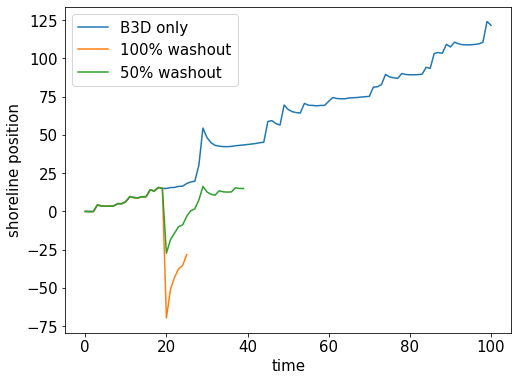

In [13]:
m_xsTS_50 = np.subtract(cascade_outwash50.barrier3d[0].x_s_TS, cascade_outwash50.barrier3d[0].x_s_TS[0])
m_xsTS_50 = np.multiply(m_xsTS_50,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

# washout lost

In [14]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash0 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-right-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-right-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=0,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=1.01E-2,
    cx=0.65
)

In [15]:
for time_step in range(cascade_outwash0._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash0.update()
    if cascade_outwash0.b3d_break:
        break

 Time Step:  2

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  19Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Time Step:  674
Outwasher Ti

Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Ti

Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
O

Outwasher Time Step:  241
Outwasher Time Step:  242
Outwasher Time Step:  243
Outwasher Time Step:  244
Outwasher Time Step:  245
Outwasher Time Step:  246
Outwasher Time Step:  247
Outwasher Time Step:  248
Outwasher Time Step:  249
Outwasher Time Step:  250
Outwasher Time Step:  251
Outwasher Time Step:  252
Outwasher Time Step:  253
Outwasher Time Step:  254
Outwasher Time Step:  255
Outwasher Time Step:  256
Outwasher Time Step:  257
Outwasher Time Step:  258
Outwasher Time Step:  259
Outwasher Time Step:  260
Outwasher Time Step:  261
Outwasher Time Step:  262
Outwasher Time Step:  263
Outwasher Time Step:  264
Outwasher Time Step:  265
Outwasher Time Step:  266
Outwasher Time Step:  267
Outwasher Time Step:  268
Outwasher Time Step:  269
Outwasher Time Step:  270
Outwasher Time Step:  271
Outwasher Time Step:  272
Outwasher Time Step:  273
Outwasher Time Step:  274
Outwasher Time Step:  275
Outwasher Time Step:  276
Outwasher Time Step:  277
Outwasher Time Step:  278
Outwasher Ti

Outwasher Time Step:  558
Outwasher Time Step:  559
Outwasher Time Step:  560
Outwasher Time Step:  561
Outwasher Time Step:  562
Outwasher Time Step:  563
Outwasher Time Step:  564
Outwasher Time Step:  565
Outwasher Time Step:  566
Outwasher Time Step:  567
Outwasher Time Step:  568
Outwasher Time Step:  569
Outwasher Time Step:  570
Outwasher Time Step:  571
Outwasher Time Step:  572
Outwasher Time Step:  573
Outwasher Time Step:  574
Outwasher Time Step:  575
Outwasher Time Step:  576
Outwasher Time Step:  577
Outwasher Time Step:  578
Outwasher Time Step:  579
Outwasher Time Step:  580
Outwasher Time Step:  581
Outwasher Time Step:  582
Outwasher Time Step:  583
Outwasher Time Step:  584
Outwasher Time Step:  585
Outwasher Time Step:  586
Outwasher Time Step:  587
Outwasher Time Step:  588
Outwasher Time Step:  589
Outwasher Time Step:  590
Outwasher Time Step:  591
Outwasher Time Step:  592
Outwasher Time Step:  593
Outwasher Time Step:  594
Outwasher Time Step:  595
Outwasher Ti

Outwasher Time Step:  874
Outwasher Time Step:  875
Outwasher Time Step:  876
Outwasher Time Step:  877
Outwasher Time Step:  878
Outwasher Time Step:  879
Outwasher Time Step:  880
Outwasher Time Step:  881
Outwasher Time Step:  882
Outwasher Time Step:  883
Outwasher Time Step:  884
Outwasher Time Step:  885
Outwasher Time Step:  886
Outwasher Time Step:  887
Outwasher Time Step:  888
Outwasher Time Step:  889
Outwasher Time Step:  890
Outwasher Time Step:  891
Outwasher Time Step:  892
Outwasher Time Step:  893
Outwasher Time Step:  894
Outwasher Time Step:  895
Outwasher Time Step:  896
Outwasher Time Step:  897
Outwasher Time Step:  898
Outwasher Time Step:  899
Outwasher Time Step:  900
Outwasher Time Step:  901
Outwasher Time Step:  902
Outwasher Time Step:  903
Outwasher Time Step:  904
Outwasher Time Step:  905
Outwasher Time Step:  906
Outwasher Time Step:  907
Outwasher Time Step:  908
Outwasher Time Step:  909
Outwasher Time Step:  910
Outwasher Time Step:  911
Outwasher Ti

Outwasher Time Step:  1183
Outwasher Time Step:  1184
Outwasher Time Step:  1185
Outwasher Time Step:  1186
Outwasher Time Step:  1187
Outwasher Time Step:  1188
Outwasher Time Step:  1189
Outwasher Time Step:  1190
Outwasher Time Step:  1191
Outwasher Time Step:  1192
Outwasher Time Step:  1193
Outwasher Time Step:  1194
Outwasher Time Step:  1195
Outwasher Time Step:  1196
Outwasher Time Step:  1197
Outwasher Time Step:  1198
Outwasher Time Step:  1199
Outwasher Time Step:  1200
Outwasher Time Step:  1201
Outwasher Time Step:  1202
Outwasher Time Step:  1203
Outwasher Time Step:  1204
Outwasher Time Step:  1205
Outwasher Time Step:  1206
Outwasher Time Step:  1207
Outwasher Time Step:  1208
Outwasher Time Step:  1209
Outwasher Time Step:  1210
Outwasher Time Step:  1211
Outwasher Time Step:  1212
Outwasher Time Step:  1213
Outwasher Time Step:  1214
Outwasher Time Step:  1215
Outwasher Time Step:  1216
Outwasher Time Step:  1217
Outwasher Time Step:  1218
Outwasher Time Step:  1219
O

c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 Time Step:  40Barrier has HEIGHT DROWNED at t = 41 years


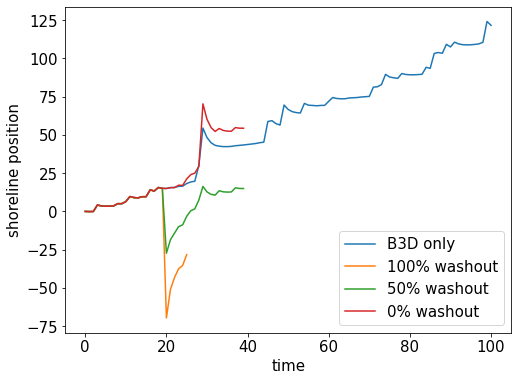

In [16]:
m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
m_xsTS_0 = np.multiply(m_xsTS_0,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
plt.plot(m_xsTS_0, label="0% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

# plotting Qow

Text(0.5, 1.0, 'Overwash')

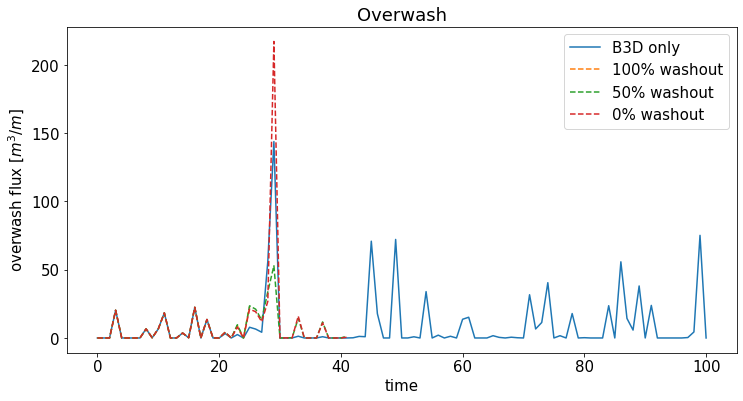

In [17]:
OWTS = cascade_b3d_only.barrier3d[0].QowTS #m3/m
OWTS2 = cascade_outwash100.barrier3d[0].QowTS #m3/m
OWTS3 = cascade_outwash50.barrier3d[0].QowTS #m3/m
OWTS4 = cascade_outwash0.barrier3d[0].QowTS #m3/m

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams.update({"font.size": 15})

plt.plot(OWTS, label="B3D only")
plt.plot(OWTS2, linestyle="dashed", label="100% washout")
plt.plot(OWTS3, linestyle="dashed", label="50% washout")
plt.plot(OWTS4, linestyle="dashed", label="0% washout")
# plt.plot(OWTS3, label="Outwash every 20 years")
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("overwash flux [$m^3/m$]")
plt.legend()
plt.title("Overwash")